<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/Class_03_2_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

##### **Module 3: Convolutional Neural Networks (CNN's)**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Biology, Health and the Environment](https://sciences.utsa.edu/bhe/), [UTSA](https://www.utsa.edu/)

### Module 3 Material

* Part 3.1: Using Convolutional Neural Networks
* **Part 3.2: Using Pre-Trained Neural Networks with Keras**
* Part 3.3: Facial Recognition and Analysis
* Part 3.4: Introduction to GAN's for Image and Data Generation

#### **Change your Runtime Now!**

For this lesson you must have a GPU hardware accelerator (e.g. `A100`).

## Google CoLab Instructions

You MUST run the following code cell to get credit for this class lesson. By running this code cell, you will map your GDrive to /content/drive and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this class lesson.

In [1]:
# You must run this cell first
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    COLAB = True
    print("Note: Using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this lesson.")
    COLAB = False

Mounted at /content/drive
Note: Using Google CoLab
david.senseman@gmail.com


You should see the following output except your GMAIL address should appear on the last line.

![__](https://biologicslab.co/BIO1173/images/class_01/class_01_6_image01A.png)

If your GMAIL address does not appear your lesson will **not** be graded.

## **TIME WARNING!**

This lesson will probably **require close to 3 hours to complete**. Besides the normal issues there are two instances in which you are required to train a neural network. Training time for both neural networks is about 1 hour.

Don't start working on this lesson if you don't have sufficient free time to finish it.

## Accelerated Run-time Check

You MUST run the following code cell to get credit for this class lesson. The code in this cell checks what hardware acceleration you are using. To run this lesson, you must be running a Graphics Processing Unit (GPU).

In [2]:
# You must run this cell second

import tensorflow as tf

# ------------------------------------------------------------------------
# 0️⃣  Create check_device() function
# ------------------------------------------------------------------------

def check_device():
    # Check for available devices
    devices = tf.config.list_physical_devices()

    # Initialize device flags
    cpu = False
    gpu = False
    tpu = False

    # Check device types
    for device in devices:
        if device.device_type == 'CPU':
            cpu = True
        elif device.device_type == 'GPU':
            gpu = True
        elif device.device_type == 'TPU':
            tpu = True

    # Output device status
    if tpu:
        print("Running on TPU")
        print("WARNING: You must run this assigment using a GPU to earn credit")
        print("Change your RUNTIME now!")
    elif gpu:
        print("Running on GPU")
        gpu_info = !nvidia-smi
        gpu_info = '\n'.join(gpu_info)
        print(gpu_info)
        print("You are using a GPU hardware accelerator--You're good to go!")
    elif cpu:
        print("Running on CPU")
        print("WARNING: You must run this assigment using a GPU to earn credit")
        print("Change your RUNTIME now!")
    else:
        print("No compatible device found")
        print("WARNING: You must run this assigment using either a GPU or a TPU to earn credit")
        print("Change your RUNTIME now!")

# ------------------------------------------------------------------------
# 1️⃣  Call function
# ------------------------------------------------------------------------

check_device()

Running on GPU
Fri Sep  5 00:27:11 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA A100-SXM4-80GB          Off |   00000000:00:05.0 Off |                    0 |
| N/A   34C    P0             57W /  400W |       5MiB /  81920MiB |      0%      Default |
|                                         |                        |             Disabled |
+--------------------------------

If you current `Runtime` is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_05/class_05_4_image11A.png)

However, if you received this warning message

![__](https://biologicslab.co/BIO1173/images/class_05/class_05_4_image14A.png)

You **MUST** go back and change your `Runtime` **NOW** before you continue.

### Create Custom Function

The cell below creates a custom function called `hms_string()`. This function is needed to record the time required to train your neural network model.

If you fail to run this cell now, you will receive one (or more) error message(s) later in this lesson.

In [20]:
# Create custom function

# ------------------------------------------------------------------------
# 0️⃣  Create hms_string()
# ------------------------------------------------------------------------

# Simple function to print out elasped time
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

### **DOWNLOAD AND INSTALL PRE-TRAINED NEURAL NETWORKS**

We will be using two pre-trained neural networks in this lesson, `ResNet50` and `ResNet101`. Run the next couple of code cells to download these neural networks to your COLAB environment.

### Download `ResNet50`

In [4]:
# Download ResNet50

import tensorflow.keras
from tensorflow.keras.applications import ResNet50

ResNet50_model_244 = ResNet50(weights='imagenet',include_top=True)

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image26C.png)

### Download`ResNet101`

In [5]:
# Download ResNet101

import tensorflow.keras
from tensorflow.keras.applications import ResNet101

ResNet101_model_512 = ResNet101(weights='imagenet',include_top=True)

179648224/179648224 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image26C.png)

### Install Helper Functions for Examples and **Exercises**

The code in the cell below creates a two functions that we will need to use classify images in Examples 1 and 2.

* **make_square()** Since MobileNet is designed to classify images with the same number of horizontal and vertical pixels (i.e. a 'square' image), this function uses a combination of padding and cropping to convert any image into a 'square` image.

* **classify_image()** This function does most of the work. It first retrives the image from the HTTPS server and resizes it before processing it by the `ResNet50 model` that we previously downloaded. The actual prediction is made by this line of code:
```text
preds = ResNet50_model_244.predict(x)
```

In [6]:
# Install helper functions

# %matplotlib inline   # uncomment if you are in a Jupyter notebook

# ----------------------------------------------------------------------
# Imports
# ----------------------------------------------------------------------
from PIL import Image, ImageFile, UnidentifiedImageError
import requests
import numpy as np
from io import BytesIO
from IPython.display import display

from tensorflow.keras.applications.resnet import ResNet50, decode_predictions, preprocess_input
from tensorflow.keras.preprocessing import image

# ----------------------------------------------------------------------
# Global settings
# ----------------------------------------------------------------------
IMAGE_WIDTH, IMAGE_HEIGHT = 224, 224          # target resolution
ImageFile.LOAD_TRUNCATED_IMAGES = False       # keep the default behaviour

# Load the pretrained ResNet‑50 model
ResNet_model_244 = ResNet50(weights='imagenet')

# Base URL of the images
ROOT = "https://biologicslab.co/BIO1173/images/class_03/"

# ----------------------------------------------------------------------
# Utility functions
# ----------------------------------------------------------------------
def make_square(img):
    """
    Crop the image to a square (center‑aligned).
    """
    width, height = img.size
    side = min(width, height)
    left   = (width  - side) // 2
    top    = (height - side) // 2
    right  = left + side
    bottom = top  + side
    return img.crop((left, top, right, bottom))

# ----------------------------------------------------------------------
# Core function
# ----------------------------------------------------------------------
def classify_image(url):
    """
    Download an image from *url*, preprocess it, run it through ResNet‑50,
    display the image and print the top‑5 ImageNet predictions.
    """
    try:
        response = requests.get(url)
        response.raise_for_status()          # raise an error on bad status
        img = Image.open(BytesIO(response.content)).convert('RGB')
    except UnidentifiedImageError:
        print("Error: Cannot identify image file. Check the image URL or file format.")
        return
    except Exception as e:
        print(f"Error while downloading or opening the image: {e}")
        return

    # Resize (or square‑crop first if you prefer)
    img = img.resize((IMAGE_WIDTH, IMAGE_HEIGHT), Image.LANCZOS)

    # Preprocess
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    # Predict
    preds = ResNet50_model_244.predict(x)

    # Show the image
    display(img)

    # Print the top‑5 predictions
    print("\nTop‑5 predictions:")
    for pred in decode_predictions(preds, top=5)[0]:
        print(f"  {pred[1]:<25} : {pred[2]*100:5.2f}%")




If the code is correct you should **not** see any output.

### Example 1: Classify Images with ResNet50

The code in the cell below downloads an image of a dog from the course fileserver, https://biologicslab.co and then uses the pre-trained `ResNet50` neural network  `ResNet50` to to classify it.

The image name is "pembroke_corgi.jpg"

Analyzing  https://biologicslab.co/BIO1173/images/class_03/pembroke_corgi.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


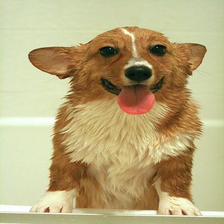


Top‑5 predictions:
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
  Pembroke                  : 95.85%
  Cardigan                  :  3.63%
  Norwich_terrier           :  0.25%
  tub                       :  0.10%
  Australian_terrier        :  0.04%


In [7]:
# Example 1: Classify Image with ResNet50

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet import preprocess_input

# Enter image name
image_name="pembroke_corgi.jpg"

# Generate image path
image_path=ROOT+image_name

# Print path
print(f"Analyzing ", image_path)

# Use ResNet50 to classify image
classify_image(image_path)

If the code is correct you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image25C.png)

`ResNet50` has been trained to recognize a wide range of common objectes. Here is a basic list:

| Domain                           | Example classes (just a few from each)                                   |
|----------------------------------|--------------------------------------------------------------------------|
| Animals – mammals                | chimpanzee, tiger, lion, zebra, elephant                                |
| Animals – birds                  | eagle, sparrow, penguin, flamingo, crane                                 |
| Animals – reptiles & amphibians  | alligator, snake, frog, turtle                                          |
| Animals – fish & crustaceans     | goldfish, salmon, shrimp, lobster                                       |
| Animals – insects                | bee, butterfly, ant, dragonfly                                          |
| Plants & flowers                 | daisy, sunflower, orchid, cactus                                        |
| Fruits & vegetables              | apple, orange, broccoli, carrot                                         |
| Vegetables & nuts                | potato, tomato, almond, cashew                                          |
| Instruments & musical equipment  | guitar, piano, violin, saxophone                                        |
| Sports & equipment               | tennis racket, golf ball, basketball, soccer ball                       |
| Vehicles – land                  | car, truck, motorcycle, bicycle                                         |
| Vehicles – air                   | airplane, helicopter, jet, glider                                       |
| Vehicles – water                 | boat, ship, submarine, ferry                                            |
| Buildings & architecture         | bridge, house, church, skyscraper                                       |
| Furniture                        | chair, table, sofa, bed                                                  |
| Home appliances                  | microwave, refrigerator, toaster, blender                               |
| Tools & hardware                 | hammer, screwdriver, wrench, drill                                      |
| Clothing & accessories           | t‑shirt, hat, shoes, glasses                                            |
| Food & drinks                    | coffee, tea, pizza, cake                                                |
| Miscellaneous                    | toilet paper, keyboard, watch, trophy                                   |


Clearly `ResNet50` was trained to classify dogs. What is somewhat interesting, is that `ResNet50` appears to be quite good as to correctly identify a dog's breed. `ResNet50` was absolutedly correct that the image showed a `Welsh Pembroke Corgi`.

The **Pembroke Welsh Corgi** is a spirited, compact herding dog originally from Wales. Known for its short legs, fox-like ears, and expressive eyes, it's affectionate, intelligent, and highly trainable. Pembrokes thrive on activity, enjoy family life, and are renowned for their loyal, playful nature and distinctive “corgi grin.”

### **Exercise 1: Classify Images with ResNet50**

In the cell below write the code to download an another dog image from the course fileserver:

```type
image_name="bouvier_des_flandres.jpg"
```
and then uses `ResNet50` to classify it. This species is much less common than Corgis.

The **Bouvier des Flandres**, or **Bouvier de Flanders**, is a muscular, medium‑to‑large herding dog originally bred in the Flemish region of Belgium to manage cattle, sheep and pack loads. With a dense, double‑coated coat that comes in black, brown, red or tricolor, they are built for endurance and can thrive in both wet and dry climates. Their temperament is confident and affectionate, yet they possess a strong work ethic and a naturally protective instinct, making them excellent companion animals as well as valuable in search‑and‑rescue, therapy, and police work. Bouviers are intelligent and trainable, but they require consistent socialization and mental stimulation to prevent stubbornness or frustration. Health concerns are relatively few—chiefly hip dysplasia, gastric dilatation‑volvulus (bloat) and certain eye conditions—so with proper care, they can live 10–12 years.

Analyzing  https://biologicslab.co/BIO1173/images/class_03/bouvier_des_flandres.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


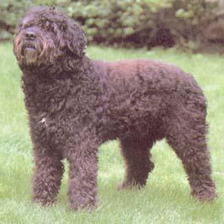


Top‑5 predictions:
  Irish_water_spaniel       : 61.85%
  Bouvier_des_Flandres      : 29.28%
  briard                    :  2.37%
  miniature_poodle          :  1.41%
  Kerry_blue_terrier        :  1.02%


In [8]:
# Example 1: Classify Image with ResNet50

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet import preprocess_input

# Enter image name
image_name="bouvier_des_flandres.jpg"

# Generate image path
image_path=ROOT+image_name

# Print path
print(f"Analyzing ", image_path)

# Use ResNet50 to classify image
classify_image(image_path)

If the code is correct you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image27C.png)

This time `ResNet50` got a little confused. It was "pretty sure" (62%) that the dog in the image was an `Irish water spaniel`.

![___](https://biologicslab.co/BIO1173/images/class_03/IrishWaterSpaniel.jpg)

**Irish Water Spaniel**

However, `ResNet50` second guess (with a 29% certainty) was correct.

This mis-identification nonwithstanding, I suspect `ResNet50` is still probably better at identifying dog breeds than the average person.

### Example 2: Classify Retinal Image with ResNet50

What about medical image data? Can `ResNet50` analyze a **color fundus photograph** of the interior surface of a human retina?

Run the code in the Example 2 to see how `ResNet50` does with the following retinal image:

```text
"Retina_Score_0.png"
```


Analyzing  https://biologicslab.co/BIO1173/images/class_03/Retina_Score_0.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


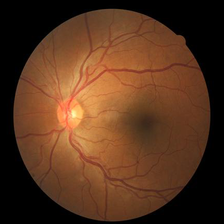


Top‑5 predictions:
  lampshade                 : 84.46%
  balloon                   :  9.32%
  chambered_nautilus        :  0.91%
  jellyfish                 :  0.49%
  mask                      :  0.31%


In [9]:
# Example 2: Classify Retinal Image with ResNEt50

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet import preprocess_input

# Enter image name
image_name="Retina_Score_0.png"

# Generate image path
image_path=ROOT+image_name

# Print path
print(f"Analyzing ", image_path)

# Use ResNet50 to classify image
classify_image(image_path)

If the code is correct you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image20C.png)


As expected, `ResNet50` was not trained to recognize retinal images. For this particular retinal image, `ResNet50` was pretty certain (84.5% probability) that this image was a lampshade. Here is an image of a lampshade that is vaguely similar:

![___](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image49C.png)

**Metal Pendant Lamp Shade Retro Style Lampshade for Kitchen Dining Room water drop - Walmart.com**

### **Exercise 2: Classify Retinal Image with `ResNet50`**

In the cell below write the code to analyze the another retinal color fundus image:
```text
"Retina_Score_1.png"
```


Analyzing  https://biologicslab.co/BIO1173/images/class_03/Retina_Score_1.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


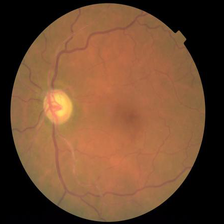


Top‑5 predictions:
  lampshade                 : 27.48%
  jellyfish                 : 27.39%
  balloon                   :  9.41%
  gong                      :  8.81%
  chime                     :  3.32%


In [10]:
# Insert your code for Exercise 2 here

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet import preprocess_input

# Enter image name
image_name="Retina_Score_1.png"

# Generate image path
image_path=ROOT+image_name

# Print path
print(f"Analyzing ", image_path)

# Use ResNet50 to classify image
classify_image(image_path)

If the code is correct you should see the following output:

![___](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image21C.png)

Once again, it would be charitable to say that `ResNet50` was a little weak when it comes to analyzing clinical images.

# **Transfer Learning for Computer Vision**

## **`ResNet`**

Many advanced prebuilt neural networks are available for computer vision, and Keras provides direct access to many networks. **Transfer Learning** is the technique where you use these prebuilt neural networks.

There are several different levels of transfer learning.

* Use a prebuilt neural network in its entirety
* Use a prebuilt neural network's structure
* Use a prebuilt neural network's weights

In this lesson we will use a popular prebuilt CNN called **`ResNet (Residual Network)`** built by Microsoft Research in 2015. The name comes from the fact that this network was designed to address the **vanishing gradient problem** that occurs when training very deep neural networks.

Instead of learning the direct mapping from input to output, `ResNet` learns the residual (i.e., the difference between the input and the output).
This is achieved using **skip connections** (also called shortcut connections), which allow the input to bypass one or more layers and be added directly to the output.

## **Transfer Learning**

**Transfer learning** is a machine learning technique where a model developed for one task is reused as the starting point for a model on a second task. In the context of image recognition, this approach is particularly effective when using deep convolutional neural networks (CNNs) like **`ResNet`**.

### **Why Use Transfer Learning?**

Training deep neural networks from scratch requires large datasets and significant computational resources. Transfer learning mitigates this by leveraging pre-trained models—typically trained on large benchmark datasets like ImageNet—to extract general features from images. These features can then be fine-tuned for a specific task with a smaller, domain-specific dataset.

### **How `ResNet` Supports Transfer Learning**

`ResNet` is a widely used CNN architecture known for its use of **residual connections**, which help in training very deep networks by addressing the vanishing gradient problem. Pre-trained versions of `ResNet` (e.g., `ResNet-50`, `ResNet-101`) are commonly used as feature extractors in transfer learning workflows.

### **Benefits**

- **Reduced Training Time**: Leverages existing learned features.
- **Improved Performance**: Often achieves better accuracy with less data.
- **Flexibility**: Can be adapted to a wide range of image classification tasks.

Transfer learning with `ResNet` is a powerful and efficient approach for developing high-performing image recognition models, especially when data or computational resources are limited.


# Example 3: Improving `ResNet` Classification Accuracy of Diabetic Retinopathy

We know from from above that the native (base) `ResNet50` neural network is unable to effectively analyze clinical retinal images.

Example 3 will demonstrate how **transfer learning** can leverage `ResNet50` as a starting point to create a new neural network that can effectively classify retinal images as to their degree of diabetic retinopathy.  

#### **`Diabetic Retinopathy Image Dataset` Classes**

The dataset we will be using is called the **`Diabetic Retinopathy Image Dataset`**. This image dataset consists of color fundus photographs—high‑resolution RGB images of the interior surface of the eye (the retina).

These are standard clinical retinal images obtained with a fundus camera (usually a 45° or 50° field-of-view, non‑mydriatic or mydriatic camera) and capture the posterior pole (macula, optic disc, retinal vessels, and surrounding retinal tissue). The images are typically stored as JPEG/PNG files with dimensions on the order of several thousand pixels (e.g., 3500x2333 px) and are used for grading the severity of diabetic retinopathy.

The severity of diabetic retinopathy was divided into **five classes** as follows:
1. **Class 0** - No Diabetic Retinopathy (No_DR)
2. **Class 1** - Mild Non-Proliferative Diabetic Retinopathy (NPDR)
3. **Class 2** - Moderate NPDR
4. **Class 3** - Severe NPDR
5. **Class 4** - Proliferative Diabetic Retinopathy (PDR)

An example of each class is shown below:

![__](https://biologicslab.co/BIO1173/images/class_03/DiabeticRetinopathyData.png)

It should be noted that differences in apparent retinal size has nothing to do with the degree of retinopathy but instead reflects the fact that the retinal images were taken by a large number of clinicians, with different imaging equipment and procedures. In other words, there is considerable "noise" in the image set.



### Install `keras_preprocessing` Package

As part of Example 3 and **Exercise 3** we need to install the Keras function `ImageDataGenerator` which is part of the Keras package `keras_preprocessing`.

Run the code in the next cell to install `keras_preprocessing` and its `ImageDataGenerator`.

In [11]:
# Install Keras package

!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.3 MB/s eta 0:00:00


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image06C.png)

### Example 3 - Step 1: Set ENVIRONMENTAL VARIABLES

The code in the cell below defines a number of `ENVIRONMENTAL VARIABLES` that are needed for later code cells.

The use of **Enivornment Variables** can allow code to be **configurable without modification**. For example, you might use different database URLs for development, testing, and production environments. As you will see later, you will re-use this code cell for **Exercise 3 - Step 1** below.

In [12]:
# Example 3 - Step 1: Set ENVIRONMENTAL VARIABLES

import os

# ------------------------------------------------------------------------
# 1️⃣  Create variables for downloading loading Zip file
# ------------------------------------------------------------------------
URL = "https://biologicslab.co/BIO1173/data/"
DOWNLOAD_SOURCE = URL+"diabetic_retinopathy_train_244.zip"
DOWNLOAD_NAME = DOWNLOAD_SOURCE[DOWNLOAD_SOURCE.rfind('/')+1:]
print("DOWNLOAD_SOURCE=",DOWNLOAD_SOURCE)
print("DOWNLOAD_NAME=",DOWNLOAD_NAME)

# ------------------------------------------------------------------------
# 2️⃣  Create variables for extracting the Zip file
# ------------------------------------------------------------------------
PATH = "./"
EXTRACT_TARGET = os.path.join(PATH,"retinopathy_244")
SOURCE = os.path.join(EXTRACT_TARGET, "train_244")
print("EXTRACT_TARGET=",EXTRACT_TARGET)
print("SOURCE=",SOURCE)

# ------------------------------------------------------------------------
# 3️⃣  Print variables for debugging
# ------------------------------------------------------------------------
print("ENVIRONMENTAL VARIABLES were successfully created.")

DOWNLOAD_SOURCE= https://biologicslab.co/BIO1173/data/diabetic_retinopathy_train_244.zip
DOWNLOAD_NAME= diabetic_retinopathy_train_244.zip
EXTRACT_TARGET= ./retinopathy_244
SOURCE= ./retinopathy_244/train_244
ENVIRONMENTAL VARIABLES were successfully created.


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image08C.png)

### Example 3 - Step 2: Download and Extract Image Data

The code in the cell below downloads a zip file and extracts it. The names of the file server, zip file and folders were set in above as ENVIRONMENTAL VARIABLES in the previous step.

**TIME WARNING:** Even when compressed (i.e. "zipped"), image data file are typically quite large to download and extraction times can often take a few minutes.

In [13]:
# Example 3 - Step 2: Download and Extract Data

import os

# --------------------------------------------------------------
# 1️⃣  Create directories
# --------------------------------------------------------------
print("Creating necessary directories...", end='')
# Create necessary directories
os.makedirs(SOURCE, exist_ok=True)
os.makedirs(EXTRACT_TARGET, exist_ok=True)
print("done.")

# --------------------------------------------------------------
# 2️⃣  Download Zip file
# --------------------------------------------------------------
print("Downloading the Zip file...", end='')
# Define paths and URLs
download_path = os.path.join(PATH, DOWNLOAD_NAME)
extract_path = os.path.join(EXTRACT_TARGET, DOWNLOAD_NAME)
# Download the file
os.system(f"wget -O {DOWNLOAD_NAME} {DOWNLOAD_SOURCE}")
print("done.")

# --------------------------------------------------------------
# 3️⃣  Extract Zip file
# --------------------------------------------------------------
print("Extracting the Zip file...", end='')
# Extract the file
os.system(f"unzip -q {DOWNLOAD_NAME} -d {EXTRACT_TARGET}")
print("done.")

# --------------------------------------------------------------
# 4️⃣  Verify Extraction was sucessful
# --------------------------------------------------------------
print("Verify Extraction")
!ls -l {EXTRACT_TARGET} | head

Creating necessary directories...done.
Extracting the Zip file...done.
Verify Extraction
total 1644
drwxr-xr-x 2 root root 1212416 Sep  5 00:31 train_244
-rw-rw---- 1 root root  465317 Feb  6  2015 trainLabels.csv


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image28C.png)

**NOTE:** Unless you see this last line in the output:
```text
-rw-rw---- 1 root root  465317 Feb  6  2015 trainLabels.csv
```
it means your download and extraction has failed! As a TA or your Instructor for help.

### Example 3 - Step 3: Check Image Data

## Why Image Data Can Become Corrupted During File Transfers

When you move an image file from one location to another—whether over a local network, the Internet, a USB stick, or a cloud storage service—many things can go wrong. Image files are just sequences of bytes; if those bytes get altered or dropped, the image will no longer render correctly. Below are the most common causes (and a few less‑common ones) of corruption.

| Cause | What Happens | Why It Corrupts the Image |
|-------|--------------|---------------------------|
| **Packet Loss / Transmission Errors** | A packet of data disappears or is damaged in transit. | The receiver reconstructs the file without those bytes, leaving gaps or wrong values. |
| **Missing or Extra Packets** | A packet is duplicated or omitted. | The file size becomes inconsistent, causing the image loader to misinterpret subsequent data. |
| **Checksum/CRC Mismatch** | The integrity check fails because data changed. | The application may silently use the corrupted data instead of aborting the transfer. |
| **Buffer Overruns / Stack Corruption** | Software writes beyond the buffer allocated for a packet. | Corrupted memory can overwrite adjacent data, including image bytes. |
| **File System or Storage Media Errors** | Bad sectors, power failure, or faulty flash memory. | Bits stored on disk get flipped or erased. |
| **Software Bugs in Transfer Tools** | A bug in `scp`, `rsync`, a cloud sync client, etc. | The bug can truncate or append data incorrectly. |
| **Encoding / Compression Mismatch** | Image saved in JPEG, but the transfer tool mis‑interprets or re‑compresses it. | Loss of fidelity or structural corruption. |
| **Inadequate or Corrupted Encryption** | Encrypted payload gets altered before decryption. | The decryption process may produce garbled data. |
| **Version/Protocol Mismatch** | Sender uses a newer protocol that the receiver doesn’t support. | The receiver mis‑parses the data stream. |
| **Interrupted or Partial Transfers** | Transfer is stopped by user, network timeout, or power outage. | The file ends abruptly; loaders may treat it as corrupt or display only a partial image. |
| **Operating‑System / Driver Issues** | Disk driver misreads sectors, or OS kernel mismanages the buffer. | Low‑level corruption of stored bytes. |
| **Malware / Intentional Tampering** | Malicious software modifies the file. | Deliberate corruption of the image data. |

---

## How Corruption Manifests in Images

1. **Blurry or Random Noise** – Bits were flipped, causing pixels to display as wrong colors.  
2. **Missing Sections** – Large areas are blank or show a repeated pattern (because the file was truncated).  
3. **File Not Openable** – Image viewers complain about “file format error” or “unexpected end of file.”  
4. **Artifacts in Specific Channels** – Only RGB or alpha channels look wrong if only part of the data is corrupted.  
5. **Mosaic of Repeated Tiles** – The file may contain duplicate image segments (e.g., if a packet was duplicated).  

---

## Common Mitigation Strategies

| Strategy | How It Helps |
|----------|--------------|
| **Use checksums (SHA‑256, MD5, CRC32)** | Verify that the file received matches the original. |
| **Enable error‑correction (e.g., `rsync` with `--checksum`, or cloud providers that use erasure coding)** | Detect and correct lost or altered blocks. |
| **Employ reliable protocols (TCP, SFTP, FTPS)** | TCP guarantees packet order and retransmission. |
| **Use multipart uploads with integrity checks (AWS S3, Azure Blob)** | Each part can be verified individually. |
| **Store backups on multiple media** | If one copy is corrupted, another may be intact. |
| **Check disk health (SMART, surface scans)** | Prevents future storage‑related corruption. |
| **Use versioned storage (Git LFS, cloud versioning)** | Allows rollback to a known good state. |
| **Validate image after transfer** | Open it in a viewer, run a tool like `identify` (ImageMagick) or `exiftool`. |

---

### Bottom Line

Image files are vulnerable to corruption at **every stage** where data moves—from the original camera capture, through storage, over a network, to the destination. The corruption usually arises from lost, duplicated, or altered **bytes**. Using proper protocols, integrity checks, and storage hygiene significantly reduces the risk, but it can never be 100 % eliminated without end‑to‑end verification.


The code in the next cell will ckeck the data integrity of every image file.

In [14]:
# Example  3 - Step 3: Check image data

import os
import io
import shutil
from pathlib import Path
from PIL import Image

# Set Delete
DELETE  = True     # set to False if you only want to *report* the bad files

# ------------------------------------------------------------------
# 1️⃣  Utility: test a single file (exactly how ImageDataGenerator does it)
# ------------------------------------------------------------------
def _is_good_image(path: Path) -> bool:
    """Return True if Pillow can read the image, False otherwise."""
    try:
        with path.open("rb") as f:
            data = f.read()
        Image.open(io.BytesIO(data)).convert("RGB")
        return True
    except Exception:
        return False

# ------------------------------------------------------------------
# 2️⃣  Scan the whole directory tree
# ------------------------------------------------------------------
print("----------Starting Scan--------------------------------")
print("    This might take a few minutes\n")
bad_files = []

for root, _dirs, files in os.walk(SOURCE):
    for fn in files:
        p = Path(root) / fn
        if not _is_good_image(p):
            bad_files.append(p)

print(f"Found {len(bad_files)} corrupt / unreadable images in {SOURCE}")

# ------------------------------------------------------------------
# 3️⃣  Delete (or rename) the bad files
# ------------------------------------------------------------------
if bad_files:
    if DELETE:
        for p in bad_files:
            try:
                # rename so you still have a copy you can inspect
                backup = p.with_suffix(p.suffix + ".corrupt")
                p.rename(backup)
                print(f"  → renamed {p} → {backup}")
            except OSError as e:
                print(f"  !! could not rename {p}: {e}")
        print(f"All {len(bad_files)} bad files have been renamed.")
    else:
        print("Set DELETE=True if you want to actually delete/rename them.")
else:
    print("No bad files to delete – you’re good to go!")

Found 2 corrupt / unreadable images in ./retinopathy_244/train_244
  → renamed retinopathy_244/train_244/info.height?info.height:info.width]x%[fx:info.width → retinopathy_244/train_244/info.height?info.height:info.width]x%[fx:info.width.corrupt
  → renamed retinopathy_244/train_244/info.height?info.height:info.width]+0+0 → retinopathy_244/train_244/info.height?info.height:info.width]+0+0.corrupt
All 2 bad files have been renamed.


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image29C.png)

### Example 3 - Step 4: Load Labels for the Training Set

CNNs are trained by _supervised_ learning, which means that during each training step the network's prediction must be compared to a known correct answer. The label supplies this target: it allows a loss function (e.g., cross‑entropy, IoU, etc.) to be computed, which in turn provides gradients that tell the optimizer how to adjust the weights. Without a label, the loss cannot be evaluated, no gradients can be derived, and the network has no signal to improve its predictions. Thus, labels are essential for defining the training objective and enabling the network to learn from data.

The file `trainLabels.csv` contains the label information for our retinal images. This file has just two columns, **image** and **level**. The `image` specifies the image's filename and from which eye the image was obtained; for example, `10_left.png`. The `level` column contains the a numerical value between 0 and 4 which indicates the serverity of diabetic retinopathy. So in this example the **_level_** is the **image label**.

The code in the cell below reads the file `trainLabels.csv` and creates a Pandas dataframe called `eg_raw_df` to store the label information. A short amount of `eg_raw_df` is printed out for inspection to make sure the code worked as expected.

In [15]:
# Example 3 - Step 4: Load the labels for the training set

import pandas as pd

# Read labels and create dataframe
eg_raw_df = pd.read_csv(
        os.path.join(EXTRACT_TARGET,"trainLabels.csv"),
        na_values=['NA', '?'])

# Add file extention
image_col = 'image'
eg_raw_df[image_col] = eg_raw_df[image_col].astype(str) + '.png'

# Print sample for verification
eg_raw_df

,image,level
0,10_left.png,0
1,10_right.png,0
2,13_left.png,0
3,13_right.png,0
4,15_left.png,1
...,...,...
35121,44347_right.png,0
35122,44348_left.png,0
35123,44348_right.png,0
35124,44349_left.png,0


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image04C.png)

### Example 3 - Step 5: Split Images into Training and Validation sets

If you judge the model only on the same data you used to update its weights, you’ll get an *optimistic* estimate of its performance – the model will look perfect on the training set but will usually fail on new images.  
Splitting the data into **training + validation** lets you:

1. **Measure true generalization** - see how the network behaves on unseen samples.  
2. **Tune hyper‑parameters** - learning rate, number of layers, data‑augmentation policies, etc.  
3. **Detect & prevent over‑fitting** - monitor validation loss/accuracy during training and stop or adjust when the model starts to degrade.  
4. **Select the best model** - keep the checkpoint that had the lowest validation error.  

Without a validation set, you'll be blind to over-fitting, you'll have no reliable metric for early stopping, and you'll have no principled way to pick the best architecture or hyper-parameters.

The code in the cell below, splits the retinal images into a training set and a validation set. How much of the train set is used for the validation set depends on the variable `FRAC`. In the cell below, `FRAC` is set to 0.8 which means 80% of the images will be put into the training set (`eg_train_df`)and the remaining 20% will be put into the validation set (`eg_val_df`). Which images are used in each set is randomize.

The number images in both sets is printed out.

In [16]:
# Example 3 - Step 5: Split images into training and validation sets

# Set split fraction
FRAC=0.8

# Convert the class column to string – required for `flow_from_dataframe`
eg_raw_df['level'] = eg_raw_df['level'].astype(str)

# ------------------------------------------------------------------
#  1️⃣ Randomly split data into training and validation sets
# ------------------------------------------------------------------
eg_train_df = eg_raw_df.sample(frac=FRAC, random_state=42)
eg_val_df   = eg_raw_df.drop(eg_train_df.index)

# Calculate the split fraction as sanity check
split_fraction = len(eg_train_df) / (len(eg_val_df) + len(eg_train_df))

# Print out numbers
print(f"Training set size   : {len(eg_train_df)}")
print(f"Validation set size : {len(eg_val_df)}")
print(f"Calculated split fraction =", split_fraction)

# Quick sanity check
print("\nSample training rows:")
print(eg_train_df[['image', 'level']].head())

print("\nSample validation rows:")
print(eg_val_df[['image', 'level']].head())


Training set size   : 28101
Validation set size : 7025
Calculated split fraction = 0.8000056937880772

Sample training rows:
                 image level
19025  23997_right.png     0
10159  12793_right.png     0
14413  18073_right.png     0
8910    11182_left.png     0
33989  42966_right.png     0

Sample validation rows:
           image level
9   17_right.png     1
16   22_left.png     0
24   31_left.png     0
25  31_right.png     0
53  58_right.png     0


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image30C.png)

### Example 3 - Step 6: Create Image Generator

The code in the cell uses the `TensorFlow/Keras` utility `ImageDataGenerator` to creates an **Image Generator**.  

**`ImageDataGenerator`** is a powerful utility in Keras that allows you to efficiently load, preprocess, and augment image data for training deep learning models. It helps improve model generalization by applying random transformations to training images, such as rotations, shifts, flips, and more.

#### **Key Features**
- **Real-time data augmentation**: Applies transformations on the fly during training.
- **Memory efficiency**: Loads images in batches, reducing memory usage.
- **Preprocessing**: Includes rescaling, normalization, and standardization.

#### **Common Parameters**
```python
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize pixel values
    rotation_range=40,           # Random rotation
    width_shift_range=0.2,       # Horizontal shift
    height_shift_range=0.2,      # Vertical shift
    shear_range=0.2,             # Shear transformation
    zoom_range=0.2,              # Zoom in/out
    horizontal_flip=True,        # Flip images horizontally
    fill_mode='nearest'          # Fill in new pixels
)
```
**IMPORTANT NOTE:**

You need to be very careful to correctly set the **IMAGE SIZE**. This is especially true when performing transfer learning with pre-trained neural networks like `ResNet50`. `ResNet50` is designed to work with square images of exactly `244` pixels wide and `244` pixels high (i.e. `244 X 244`) that have 3 color channels (i.e. `RGB`) and no `alpha` channel.

In the cell below, here is the code that specifies the image size:
```type
# Specify Image Size
IMG_W, IMG_H = 244, 244
```

In [17]:
# Example 3 - Step 6: Create image generator

from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

# Specify Image Size
IMG_W, IMG_H = 244, 244

BATCH_TRAIN  = 32
BATCH_VAL    = 32

# --------------------------------------------------------------------
# 1️⃣ Training generator – augmentations
# --------------------------------------------------------------------
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # for *ResNet* pre‑proc
    width_shift_range=0.2,       # Horizontal shift
    height_shift_range=0.2,      # Vertical shift
    horizontal_flip=True,        # Flip images horizontally
    zoom_range=0.2,              # Zoom in/out
    fill_mode='nearest',         # Fill in new pixels
)

train_gen = train_datagen.flow_from_dataframe(
    dataframe=eg_train_df,
    directory=str(SOURCE),
    x_col='image',          # column that holds the file name
    y_col='level',          # column that holds the class string
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_TRAIN,
    class_mode='categorical',   # one‑hot (shape (batch, 5))
    shuffle=True,
)

# --------------------------------------------------------------------
# 2️⃣ Validation generator -- no augmentation
# --------------------------------------------------------------------
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=eg_val_df,
    directory=str(SOURCE),
    x_col='image',
    y_col='level',
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_VAL,
    class_mode='categorical',
    shuffle=False,
)

# Sanity Check
x_train, y_train = next(train_gen)
x_val,   y_val   = next(val_gen)

print("TRAIN batch  : ", x_train.shape, y_train.shape)   # should be (32, 244, 244, 3) , (32, 5)
print("VAL   batch  : ", x_val.shape,   y_val.shape)     # same, but 32 samples if 7025>batch


Found 28101 validated image filenames belonging to 5 classes.
Found 7025 validated image filenames belonging to 5 classes.
TRAIN batch  :  (32, 244, 244, 3) (32, 5)
VAL   batch  :  (32, 244, 244, 3) (32, 5)


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image31C.png)

### Example 3 - Step 7: Check Class Distribution

The code in the cell below generates a histogram showing the distribution of the 5 classes in the validation data set.

#### **Why Check Class Distribution in CNN Classification?**


When training a Convolutional Neural Network (CNN) for image classification, examining the distribution of classes in your dataset helps ensure that your model learns effectively and generalizes well. Here's why it's important:

#### **1. Detecting Class Imbalance**
If one class has significantly more samples than others, the model may become biased toward predicting the majority class. This can lead to:
- High accuracy but poor performance on minority classes.
- Misleading evaluation metrics.

#### **2. Choosing the Right Metrics**
In imbalanced datasets, accuracy alone is not a reliable metric. You may need to use:
- Precision, recall, F1-score
- Confusion matrix
- ROC-AUC (for binary classification)

#### **3. Designing Better Validation Strategies**
Knowing the class distribution helps in:
- Stratified sampling for train/test splits
- Ensuring each class is represented in validation and test sets

#### **4. Applying Corrective Techniques**
If imbalance is detected, you can apply:
- **Data augmentation** for minority classes
- **Class weighting** in the loss function
- **Oversampling** or **undersampling**
- **Synthetic data generation** (e.g., SMOTE)

#### **5. Improving Interpretability**
Understanding class distribution helps interpret model behavior and debug issues like:
- Why the model is misclassifying certain classes
- Why training loss is low but validation performance is poor


### ✅ **Best Practice**
Always visualize class distribution before training using a bar chart or value counts.

Following **Best Practice**, the code in the cell below generates a bar chart showing the class distribution before we start our training.

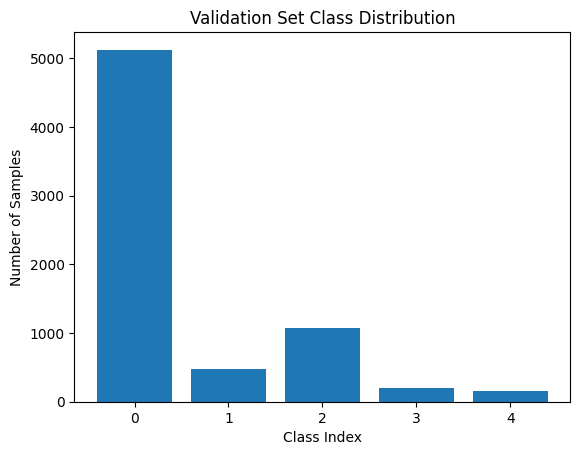

In [18]:
# Example 3 - Step 7: Check Class Distribution

import numpy as np
import matplotlib.pyplot as plt

# Count class distribution
eg_labels_val = val_gen.classes
class_counts = np.bincount(eg_labels_val)

# Plot distribution
plt.bar(range(len(class_counts)), class_counts)
plt.xlabel("Class Index")
plt.ylabel("Number of Samples")
plt.title("Validation Set Class Distribution")
plt.show()


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image32C.png)

The classes are clearly **NOT** balanced! Healthy retinal images (Class `0`) vastly out number the other classes. Unfortunately this situation is quite common in medical imaging of pathological states. The problem is that our neural network model can quickly learn that it picks `0` as the image label, it will be correct _most_ of the time.  

### Example 3 - Step 8: Setup and Compile Neural Network

The code in the cell below demonstrates how to use **transfer learning** with the **ResNet50** architecture for a custom image classification task involving 5 classes (i.e. degrees of diabetic retinopathy).

#### **What It Does**

- **Loads a pretrained `ResNet50 model`** (trained on ImageNet) without its top classification layer.
- **Freezes the base model's weights** to retain learned features and prevent them from being updated during training.
- **Adds custom layers** on top of the base model:
  - Global average pooling to reduce spatial dimensions.
  - Dense layer with ReLU activation for learning task-specific features.
  - Dropout for regularization to prevent overfitting.
  - Final softmax layer for multi-class classification (5 classes).
- **Compiles the model** using the `Adam optimizer` and `categorical crossentropy loss`, suitable for multi-class classification.

#### **Use Case**

This approach is ideal when:
- You have limited training data.
- You want to leverage powerful pretrained models.
- You need to adapt a general-purpose model to a specific classification task.

The code in the cell first generates a `base` model from `ResNet50`. It then modifies this base by adding several input layers and an output layer that are tailored to meet our specific use. The finished model called `ResNet50_model_244`. Once out model `ResNet50_model_244` is assembled, it is compiled with the appropiate optimizer (`Adam`), loss function (`categorical_crossentropy`) and metric (`accuracy`) for a _classification_ neural network.

In [19]:
# ### Example 3 - Step 8: Setup and compile neural network

from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models, optimizers

base = ResNet50(weights='imagenet', include_top=False, input_shape=(244, 244, 3))
base.trainable = False          # keep the pretrained weights frozen

x = base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(5, activation='softmax')(x)

ResNet50_model_244 = models.Model(inputs=base.input, outputs=predictions)
ResNet50_model_244.compile(optimizer=optimizers.Adam(1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image33C.png)

### Example 3 - Step 9: Train Neural Network

The code in the cell below trains the neural network `ResNet50_model_244` for the number of epochs specified by the variable `EPOCHS`. A second variable, `PATIENCE`, controls the Early Stopping monitor. To keep training time reasonable the variable EPOCH has been set to 10 and the variable PATIENCE has been set to 3.

**TIME WARNING!**

We are analyzing a **LARGE** image dataset so training will take time. Even using Google fastest GPU hardware acceleration, it will probably take more than **1 hour to complete**. So don't start training if you can't afford to wait.

**DON'T WASTE YOUR MONEY WARNING!**

To get feedback on how long the training takes, the code contains a "timer function". Specifically, the last line of code reads:
```text
print(f"Elapsed time: {hms_string(elapsed_time)}")
```
This code snippet prints out how long the training required.

If you weren't careful and skipped over running the cell that defined the custom function `hms_string()` at the start of this lesson, your model will train for an hour but then **FAIL** with an error message.

Since every time you use a COLAB GPU **costs you money**, don't waste your time and _money_ by running this code cell if you didn't run _all_ of the code cells above before you run the next one.

**You have been warned.**

In [21]:
# ### Example 3 - Step 8: Train neural network

import time
import tensorflow as tf

# Set number of epochs
EPOCHS=10

# Set Patience
PATIENCE=3

# ------------------------------------------------------------------------
# 1️⃣  Start training
# ------------------------------------------------------------------------
print(f"-- Training (classification) is starting for {EPOCHS} epochs----------------------------")
start_time = time.time()
history_244 = ResNet50_model_244.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    steps_per_epoch=len(train_gen),
    validation_steps=len(val_gen),
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=PATIENCE, restore_best_weights=True)
    ]
)

# Record end time
elapsed_time = time.time() - start_time

# Print elapsed time
print(f"Elapsed time: {hms_string(elapsed_time)}")

-- Training (classification) is starting for 10 epochs----------------------------


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 429s 471ms/step - accuracy: 0.7155 - loss: 0.9305 - val_accuracy: 0.7291 - val_loss: 0.7983
Epoch 2/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 398s 452ms/step - accuracy: 0.7394 - loss: 0.8112 - val_accuracy: 0.7327 - val_loss: 0.7747
Epoch 3/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 399s 453ms/step - accuracy: 0.7421 - loss: 0.7860 - val_accuracy: 0.7402 - val_loss: 0.7638
Epoch 4/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 395s 450ms/step - accuracy: 0.7436 - loss: 0.7788 - val_accuracy: 0.7358 - val_loss: 0.7523
Epoch 5/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 396s 450ms/step - accuracy: 0.7455 - loss: 0.7652 - val_accuracy: 0.7432 - val_loss: 0.7482
Epoch 6/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 395s 450ms/step - accuracy: 0.7497 - loss: 0.7542 - val_accuracy: 0.7399 - val_loss: 0.7517
Epoch 7/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 395s 449ms/step - accuracy: 0.7449 - loss: 0.7573 - val_accuracy: 0.7423 - val_loss: 0.7324
Epoch 8/10
879/879 ━━━━━━━━━━━━━━━━━━━━ 395s 449ms/step - accuracy: 0.7510 -

If the code is correct you should see something similar to the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image35C.png)

With COLABs best GPU accerator (`A100`) training for 10 epochs require a little over one hour to complete.

If you tried to train this model using just a CPU without GPU hardware acceleration, it would take more than 6 hours to complete 10 epochs!

------------------------------------------

### **What the training output tells you**

Here is an itemtize explanation of each item is the particular line of training output:
```text
Epoch 4/10
879/879 ━━━━━━━━ 396s 451ms/step - accuracy: 0.9237 - loss: 0.2092 - eg_val_accuracy: 0.7089 - val_loss: 0.9596
```

* **Epoch 4/10** - You are currently in the 4th epoch out of a 10-Epoch training session.

* **879/879** - 879 **batches** were processed in this epoch.

There are **28101** images in the training set and we have set the batch size = 32. If we divide the 28,191 images into 32 batches, the model will have process **879** images in each batch to see all of the training images.

* **381s** - Total time for the epoch to complete in seconds (~6 1/2 minutes).

* **451ms/step** - Average time per batch in milliseconds (~ 1/2 second).

* **accuracy: 0.9237** - The accuracy of the model for classifying **_training_** images during this epoch.

* **loss: 0.2092** - The training loss for this epoch

* **eg_val_accuracy: 0.7089** - The accuracy of the model in classifying **_validation_** images during this epoch

* **val_loss: 9596** - The validation loss for this epoch.
---------------------

### Example 3 - Step 10: Plot Training/Validation Accuracy

A **Training-versus-Validation Accuracy Plot** provides a quick visual gauge of how well a model is learning and generalising. As training progresses, a rising training accuracy shows that the model is fitting the data, while the validation accuracy tracks performance on unseen samples.

When both curves rise together and plateau, the model is likely well-balanced. If training accuracy climbs while validation accuracy lags or dips, the model is over-fitting; conversely, if both stay low, the model is under-fitting or too simple.

The shape of the curves also reveals training issues—sharp jumps or oscillations can signal an inappropriate learning rate, and noisy validation performance may indicate label noise or class imbalance. Thus, the plot informs decisions about early stopping, regularisation, architecture changes, or hyper-parameter tuning.


#### **Interpreting Common Patterns**

| Curve Shape | Interpretation | Suggested Action |
|-------------|----------------|------------------|
| **Both curves rise together and plateau at high accuracy** | Good fit & generalisation. | Continue training if you want to squeeze a bit more. |
| **Training rises, validation rises then drops** | Over‑fitting. | Add regularisation, dropout, data augmentation, or stop early. |
| **Both curves rise slowly and stay low** | Under‑fitting. | Increase model capacity, train longer, or reduce regularisation. |
| **Validation lags behind training by a fixed margin, but both improve** | Model learns but generalises less well. | Consider a larger training set, better augmentation, or a different architecture. |
| **Validation fluctuates wildly** | High variance due to small batch or high learning rate. | Reduce learning rate, increase batch size, or use a learning‑rate scheduler. |



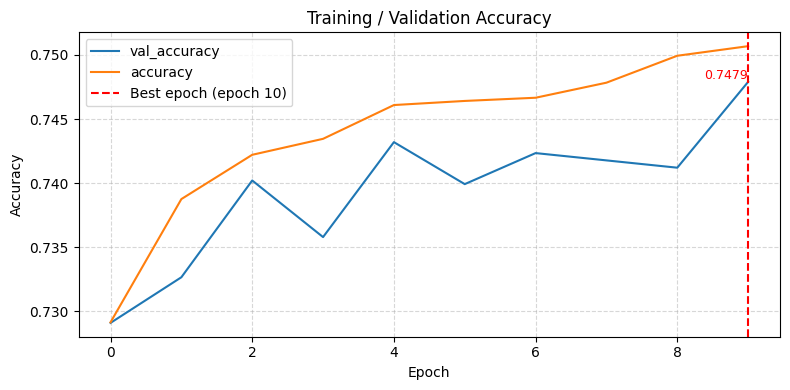

In [26]:
# Example 3 = Step 10:

import numpy as np
import matplotlib.pyplot as plt


# Pull the metrics
eg_val_acc = history_244.history.get('val_accuracy')
eg_train_acc = history_244.history.get('accuracy')

# --- Find the epoch with the highest validation accuracy -------------
# np.argmax returns the index (0‑based). Add 1 if you want to show it as "epoch 1, 2, …"
best_epoch_idx = np.argmax(eg_val_acc)          # 0‑based index
best_epoch_num = best_epoch_idx + 1          # 1‑based for display

# -----------------------------------------------------------------------

plt.figure(figsize=(8, 4))
plt.plot(eg_val_acc, label='val_accuracy')
plt.plot(eg_train_acc, label='accuracy')

# Vertical line at the best epoch (0‑based index)
plt.axvline(best_epoch_idx, color='r', linestyle='--',
            label=f'Best epoch (epoch {best_epoch_num})')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training / Validation Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Optional: annotate the exact accuracy value at the best epoch
best_eg_val_acc = eg_val_acc[best_epoch_idx]
plt.text(best_epoch_idx, best_eg_val_acc,
         f'{best_eg_val_acc:.4f}',
         va='bottom', ha='right', color='r', fontsize=9)

plt.tight_layout()
plt.show()


If the code is correct you should see something similar to the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image50C.png)

alternatively, it might look more similar to this one

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image55C.png)

Either graph is acceptable.


### Example 3 - Step 11: Save Model to GDrive

Run the next cell to save your retrained `ResNet50_model_244` model to your GDrive.

In [27]:
# Example 3 - Step 11

import os
import shutil
import tensorflow as tf

# --------------------------------------------------------------
# 1️⃣  Mount Google Drive (do this only once per session)
# --------------------------------------------------------------
# from google.colab import drive
# drive.mount('/content/drive')

# --------------------------------------------------------------
# 2️⃣  Define the names / paths
# --------------------------------------------------------------
model_name     = "ResNet50_model_244"                    # model object name
gdrive_dir     = f"/content/drive/My Drive/{model_name}"  # folder on Drive
gdrive_file    = f"{gdrive_dir}.keras"                    # the file we want to keep

local_dir      = f"/content/{model_name}"                 # the *local* folder you want to delete
local_file     = f"{local_dir}.keras"                     # if you saved a single file locally

# --------------------------------------------------------------
# 3️⃣  Make sure the Drive folder exists
# --------------------------------------------------------------
os.makedirs(gdrive_dir, exist_ok=True)

# --------------------------------------------------------------
# 4️⃣  Save the model *on* Drive (kept forever)
# --------------------------------------------------------------
ResNet50_model_244.save(gdrive_file)   # <-- this writes the file into /content/drive/My Drive/

# --------------------------------------------------------------
# 5️⃣  OPTIONAL: Verify the Drive copy exists
# --------------------------------------------------------------
print("Drive copy present:", os.path.exists(gdrive_file))
!ls ./drive/MyDrive

Drive copy present: True
 BIO5853		 MountainCar		     ResNet50_model_244.keras
 biologicslab.co.txt	 openai_api_key.txt	     retina_model.keras
'Colab Notebooks'	 projects		     tavily_api_key.txt
 EBooks			 regress_model.keras	     TheMovie4.avi
 kaggle.json		 ResNet101_model_512	     VPS_address.txt
 Login			 ResNet101_model_512.keras   VPS.txt
 MLF13_IM_200930_0.pdf	 ResNet50_model_244


If the code is correct you should see something similar to the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image54C.png)

------------------------------------------


# **EXERCISE 3**

In **Exercise 3** you are going to re-analyze the Diabetic Retinopathy data set using `ResNet101` in conjunction with larger retinal images that are 512 X 512 pixels.

**`ResNet-101`** was built to give a **deeper**, **larger-receptive-field** backbone that can be trained stably thanks to residual connections. That extra depth—and the corresponding increase in receptive field and representational capacity—makes the network particularly suited to the high-resolution, high-complexity images that dominate modern clinical imaging datasets (e.g., whole-slide pathology, high‑res CT/MRI, retinal photographs).  

#### **1. Depth matters for large, complex images**

| Aspect                       | Why it matters in clinical imaging                                                                                     |
|------------------------------|------------------------------------------------------------------------------------------------------------------------|
| **Receptive field**         | • Deeper network ⇒ larger receptive field.<br>• Captures micro‑details (nuclei, capillaries) *and* macro‑context (lobule shape). |
| **Hierarchical feature extraction** | • Early layers learn edges & textures.<br>• Deeper layers combine them into complex motifs.<br>• Needed for multi‑level abstraction (malignant vs. normal). |
| **Parameter efficiency**    | • Residual blocks add depth without exploding the number of weights.<br>• 101‑layer stack packs more power while staying manageable. |


#### **2. Residual connections: the training engine that makes depth feasible**

* **Vanishing / exploding gradients** are especially problematic when you try to back‑propagate through dozens of nonlinear layers. Residual connections add a *shortcut* that lets the gradient flow almost unchanged from the output back to the input, so deeper models can be trained from scratch (or fine‑tuned on a new domain) without catastrophic loss of signal.
* In medical-image research, practitioners often *fine-tune* ImageNet‑pretrained models on limited clinical data. Because residual connections preserve gradient flow, a 101‑layer network can be adapted with fewer epochs and fewer data points than a comparable plain CNN.

#### **3. ResNet‑101 and typical clinical datasets**

| Dataset type              | Typical image size                                    | Typical complexity                                   | ResNet‑101 benefits                                                                                                                                                 |
|---------------------------|-------------------------------------------------------|-------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Whole‑slide pathology     | 10k‑40k px × 10k‑40k px (usually tiled to 512×512)   | Ultra‑fine texture + large‑scale architecture        | • Deep residual layers capture both micro‑ and macro‑features.<br>• Receptive field ≈ 400 px after 5 stages                                                      |
| Chest CT                  | 512×512 or larger                                    | Subtle texture changes, large organs                 | • Deeper encoder gives more context for slice‑to‑slice variation                                                                                                      |
| Retinal fundus            | 5000×5000 px (often cropped to 1024×1024)            | Fine vascular patterns + large vessels               | • Extra depth boosts sensitivity to minute capillary changes                                                                         
> **Bottom line**: ResNet‑101 was *not* invented *solely* for medical imaging, but its architectural traits (depth, residual links, large receptive field) make it a natural fit for the high‑resolution, highly variable images found in clinical datasets.

#### **4. Practical use-cases that illustrate the point**

1. **Whole‑slide analysis**  
   *U‑Net + ResNet‑101 encoder* is the standard backbone for segmentation of tumor vs. normal tissue. The encoder’s depth allows the network to produce rich multi‑scale feature maps that are essential for accurate boundary delineation.

2. **Histopathology classification**  
   A 101‑layer residual network fine‑tuned on 2048×2048 patches yields a 2‑fold improvement in AUC over a 50‑layer variant, especially on datasets where subtle nuclear pleomorphism is the key discriminant.

3. **Radiology reporting**  
   ResNet‑101 pre‑trained on ImageNet is used as the feature extractor for a downstream transformer that produces radiology reports. The larger depth improves the semantic quality of the extracted features, translating into more coherent, clinically relevant reports.

#### **5. What the “larger image size” means**

When people say ResNet‑101 was created “in part to analyze larger image sizes,” they're really referring to two intertwined design goals:

1. **Scale-aware receptive fields** - As the input resolution grows, the network’s receptive field must grow proportionally so that each unit still sees a meaningful portion of the image. Deeper networks naturally achieve this.

2. **Robust training** - High-resolution images contain many more pixels, which can amplify the effects of noise, small mis-alignments, or class imbalance. Residual learning keeps gradients stable, allowing the model to learn meaningful patterns from a massive pixel set without **over-fitting** or getting stuck.

---

#### **TL;DR**

ResNet‑101’s 101 layers give it a large receptive field and the capacity to learn complex, hierarchical features, which is vital for interpreting the fine‑grained details and global context in large medical images. Residual connections make training such a deep network feasible, allowing it to be fine‑tuned on the often limited clinical datasets that are typical in healthcare. That combination is why the architecture was chosen, and later adopted, for many high‑resolution clinical image‑analysis tasks.

#### **Image Size Comparison**

You should realize that `512×512×3` image is more than **4X larger** than a `244×244×3` image. Here's the math:

\begin{aligned}
512 \times 512 \times 3 &= 786{,}432 \\
244 \times 244 \times 3 &= 178{,}608 \\
\frac{786{,}432}{178{,}608} &\approx 4.4
\end{aligned}


So, the **512x512x3** image is approximately **4.4 times larger** than the **244×244×3** image in terms of pixel data.

### **Exercise 3 - Step 1: Set ENVIRONMENTAL VARIABLES**

In the cell below write the code to define a your `ENVIRONMENTAL VARIABLES`. It is important to make the all of the following changes exactly as suggested.

**Code Hints:**

1. Change this line of code
```text
DOWNLOAD_SOURCE = URL+"diabetic_retinopathy_train_244.zip"
```
to read
```text
DOWNLOAD_SOURCE = URL+"diabetic_retinopathy_train_512.zip"
```
2. Change this line of code
```text
EXTRACT_TARGET = os.path.join(PATH,"retinopathy_244")
```
to read
```text
EXTRACT_TARGET = os.path.join(PATH,"retinopathy_512")
```
3. Change this line of code
```text
SOURCE = os.path.join(EXTRACT_TARGET, "train_244")
```
to read
```text
SOURCE = os.path.join(EXTRACT_TARGET, "train_512")
```



In [28]:
# Insert your code for Exercise 3 - Step 1 here

import os

# ------------------------------------------------------------------------
# 1️⃣  Create variables for downloading loading Zip file
# ------------------------------------------------------------------------
URL = "https://biologicslab.co/BIO1173/data/"
DOWNLOAD_SOURCE = URL+"diabetic_retinopathy_train_512.zip"
DOWNLOAD_NAME = DOWNLOAD_SOURCE[DOWNLOAD_SOURCE.rfind('/')+1:]
print("DOWNLOAD_SOURCE=",DOWNLOAD_SOURCE)
print("DOWNLOAD_NAME=",DOWNLOAD_NAME)

# ------------------------------------------------------------------------
# 2️⃣  Create variables for extracting the Zip file
# ------------------------------------------------------------------------
PATH = "./"
EXTRACT_TARGET = os.path.join(PATH,"retinopathy_512")
SOURCE = os.path.join(EXTRACT_TARGET, "train_512")
print("EXTRACT_TARGET=",EXTRACT_TARGET)
print("SOURCE=",SOURCE)

# ------------------------------------------------------------------------
# 3️⃣  Print variables for debugging
# ------------------------------------------------------------------------
print("ENVIRONMENTAL VARIABLES were successfully created.")

DOWNLOAD_SOURCE= https://biologicslab.co/BIO1173/data/diabetic_retinopathy_train_512.zip
DOWNLOAD_NAME= diabetic_retinopathy_train_512.zip
EXTRACT_TARGET= ./retinopathy_512
SOURCE= ./retinopathy_512/train_512
ENVIRONMENTAL VARIABLES were successfully created.


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image37C.png)

### **Exercise 3 - Step 2: Download and Extract Image Data**

In the cell below write the code to (1) create the necessary directories, (2) download the Zip file containing the image data, (3) extract this data into the appropiate folder and (4) verify the sucess

**Code Hints:**

You can re-use the code in Example 3 - Step 2 _without_ making any code changes.

**TIME WARNING:** This Zip file is _substantially_ larger than the one you downloaded in Example 3. You can expect it to take approximately **7 minutes** to download and unzip the image files.

In [29]:
# Insert your code for Exercise 3 - Step 2 here

import os

# --------------------------------------------------------------
# 1️⃣  Create directories
# --------------------------------------------------------------
print("Creating necessary directories...", end='')
# Create necessary directories
os.makedirs(SOURCE, exist_ok=True)
os.makedirs(EXTRACT_TARGET, exist_ok=True)
print("done.")

# --------------------------------------------------------------
# 2️⃣  Download Zip file
# --------------------------------------------------------------
print("Downloading the Zip file...", end='')
# Define paths and URLs
download_path = os.path.join(PATH, DOWNLOAD_NAME)
extract_path = os.path.join(EXTRACT_TARGET, DOWNLOAD_NAME)
# Download the file
os.system(f"wget -O {DOWNLOAD_NAME} {DOWNLOAD_SOURCE}")
print("done.")

# --------------------------------------------------------------
# 3️⃣  Extract Zip file
# --------------------------------------------------------------
print("Extracting the Zip file...", end='')
# Extract the file
os.system(f"unzip -q {DOWNLOAD_NAME} -d {EXTRACT_TARGET}")
print("done.")

# --------------------------------------------------------------
# 4️⃣  Verify Extraction was successful
# --------------------------------------------------------------
print("Verify Extraction")
!ls -l {EXTRACT_TARGET} | head

Creating necessary directories...done.
Extracting the Zip file...done.
Verify Extraction
total 1620
drwxr-xr-x 2 root root 1187840 Sep  5 02:02 train_512
-rw-rw---- 1 root root  465317 Feb  6  2015 trainLabels.csv


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image38C.png)

If you don't see the last line
```text
-rw-rw---- 1 root root  465317 Feb  6  2015 trainLabels.csv
```
it means your download and/or unzipping has failed. You need to fix your problem before you can continue.

### **Exercise 3 - Step 3: Check Image Data**

In the cell below write the code to check the images that you downloaded in **Step 2**.

**Code Hints:**

You do **no**t need to modify any of the code from Example 3 - Step 3.

In [30]:
# Insert your code for Exercise 3 - Step 3 here

import os
import io
import shutil
from pathlib import Path
from PIL import Image

# Set Delete
DELETE  = True     # set to False if you only want to *report* the bad files

# ------------------------------------------------------------------
# 1️⃣  Utility: test a single file (exactly how ImageDataGenerator does it)
# ------------------------------------------------------------------
def _is_good_image(path: Path) -> bool:
    """Return True if Pillow can read the image, False otherwise."""
    try:
        with path.open("rb") as f:
            data = f.read()
        Image.open(io.BytesIO(data)).convert("RGB")
        return True
    except Exception:
        return False

# ------------------------------------------------------------------
# 2️⃣  Scan the whole directory tree
# ------------------------------------------------------------------
print("----------Starting Scan--------------------------------")
print("    This might take a few minutes\n")
bad_files = []

for root, _dirs, files in os.walk(SOURCE):
    for fn in files:
        p = Path(root) / fn
        if not _is_good_image(p):
            bad_files.append(p)

print(f"Found {len(bad_files)} corrupt / unreadable images in {SOURCE}")

# ------------------------------------------------------------------
# 3️⃣  Delete (or rename) the bad files
# ------------------------------------------------------------------
if bad_files:
    if DELETE:
        for p in bad_files:
            try:
                # rename so you still have a copy you can inspect
                backup = p.with_suffix(p.suffix + ".corrupt")
                p.rename(backup)
                print(f"  → renamed {p} → {backup}")
            except OSError as e:
                print(f"  !! could not rename {p}: {e}")
        print(f"All {len(bad_files)} bad files have been renamed.")
    else:
        print("Set DELETE=True if you want to actually delete/rename them.")
else:
    print("No bad files to delete – you’re good to go!")

Found 2 corrupt / unreadable images in ./retinopathy_512/train_512
  → renamed retinopathy_512/train_512/info.height?info.height:info.width]x%[fx:info.width → retinopathy_512/train_512/info.height?info.height:info.width]x%[fx:info.width.corrupt
  → renamed retinopathy_512/train_512/info.height?info.height:info.width]+0+0 → retinopathy_512/train_512/info.height?info.height:info.width]+0+0.corrupt
All 2 bad files have been renamed.


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image39C.png)

### **Exercise 3 - Step 4: Load Labels for the Training Set**

In the cell below write the code to extract the label information from the file `trainLabel.csv` located in your `./retinopathy_512` folder and create a DataFrame called `ex_raw_df`.

**Code Hints:**

Copy the code from `Example 3 - Step 4` and change the prefix `eg_` to `ex_`.

In [37]:
# Insert your code for Exercise 3 - Step 4 here

import pandas as pd

# Read labels and create dataframe
ex_raw_df = pd.read_csv(
        os.path.join(EXTRACT_TARGET,"trainLabels.csv"),
        na_values=['NA', '?'])

# Add file extention
image_col = 'image'
ex_raw_df[image_col] = ex_raw_df[image_col].astype(str) + '.png'

# Print sample for verification
ex_raw_df

,image,level
0,10_left.png,0
1,10_right.png,0
2,13_left.png,0
3,13_right.png,0
4,15_left.png,1
...,...,...
35121,44347_right.png,0
35122,44348_left.png,0
35123,44348_right.png,0
35124,44349_left.png,0


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image40C.png)

### **Exercise 3 - Step 5: Split Images into Training and Validation Sets**

In the cell below write the code to split your retinal images into a training set and a validation set, with 80% of the images going into the training set. After splitting, print out the number images in both sets and a short sample of both the training set and the validation set.

**Code Hints:**

Copy the code from `Example 3 - Step 5` and change the prefix `eg_` to `ex_`.

In [38]:
# Insert your code for Exercise 3 - Step 5 here

# Set split fraction
FRAC=0.8

# Convert the class column to string – required for `flow_from_dataframe`
ex_raw_df['level'] = ex_raw_df['level'].astype(str)

# Split data into training and validation sets
ex_train_df = ex_raw_df.sample(frac=FRAC, random_state=42)
ex_val_df   = ex_raw_df.drop(ex_train_df.index)

# Calculate the split fraction as sanity check
split_fraction = len(ex_train_df) / (len(ex_val_df) + len(ex_train_df))

# Print out numbers
print(f"Training set size   : {len(ex_train_df)}")
print(f"Validation set size : {len(ex_val_df)}")
print(f"Calculated split fraction =", split_fraction)

# Quick sanity check
print("\nSample training rows:")
print(ex_train_df[['image', 'level']].head())

print("\nSample validation rows:")
print(ex_val_df[['image', 'level']].head())


Training set size   : 28101
Validation set size : 7025
Calculated split fraction = 0.8000056937880772

Sample training rows:
                 image level
19025  23997_right.png     0
10159  12793_right.png     0
14413  18073_right.png     0
8910    11182_left.png     0
33989  42966_right.png     0

Sample validation rows:
           image level
9   17_right.png     1
16   22_left.png     0
24   31_left.png     0
25  31_right.png     0
53  58_right.png     0


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image41C.png)

### **Exercise 3 - Step 6: Create Image Generator**

In the cell below write the code to create an Image Generator using the `Tensorflow/Keras` utility `ImageDataGenerator`.

**Code Notes:**

Is is _very_ important that you change your image size.

Specifically you must change this code snippet:
```text
# Specify Image Size
IMG_W, IMG_H = 244, 244
```
to be
```text
# Specify Image Size
IMG_W, IMG_H = 512, 512
```
The main objective of **Exercise 3** is to analyze larger retinal imagee (512 X 512 pixels) to see if that will improve classification accuracy.

In [39]:
# Insert your code for Exercise 3 - Step 6 here

from pathlib import Path
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

# Specify Image Size
IMG_W, IMG_H = 512, 512

BATCH_TRAIN  = 32
BATCH_VAL    = 32

# --------------------------------------------------------------------
# 1️⃣ Training generator – augmentations
# --------------------------------------------------------------------
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # for *ResNet* pre‑proc
    width_shift_range=0.2,       # Horizontal shift
    height_shift_range=0.2,      # Vertical shift
    horizontal_flip=True,        # Flip images horizontally
    zoom_range=0.2,              # Zoom in/out
    fill_mode='nearest',         # Fill in new pixels
)

train_gen = train_datagen.flow_from_dataframe(
    dataframe=eg_train_df,
    directory=str(SOURCE),
    x_col='image',          # column that holds the file name
    y_col='level',          # column that holds the class string
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_TRAIN,
    class_mode='categorical',   # one‑hot (shape (batch, 5))
    shuffle=True,
)

# --------------------------------------------------------------------
# 2️⃣ Validation generator -- no augmentation
# --------------------------------------------------------------------
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_gen = val_datagen.flow_from_dataframe(
    dataframe=ex_val_df,
    directory=str(SOURCE),
    x_col='image',
    y_col='level',
    target_size=(IMG_H, IMG_W),
    batch_size=BATCH_VAL,
    class_mode='categorical',
    shuffle=False,
)

# Sanity Check
x_train, y_train = next(train_gen)
x_val,   y_val   = next(val_gen)

print("TRAIN batch  : ", x_train.shape, y_train.shape)   # should be (32, 244, 244, 3) , (32, 5)
print("VAL   batch  : ", x_val.shape,   y_val.shape)     # same, but 32 samples if 7025>batch


Found 28101 validated image filenames belonging to 5 classes.
Found 7025 validated image filenames belonging to 5 classes.
TRAIN batch  :  (32, 512, 512, 3) (32, 5)
VAL   batch  :  (32, 512, 512, 3) (32, 5)


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image42C.png)

### **Exercise 3 - Step 7: Check Class Distribution**

In the cell below write the code to generate a bar graph showing the number of images in each of the 5 output classes.

**Code Hints:**

Copy the code from `Example 3 - Step 7` and change the prefix `eg_` to `ex_`.



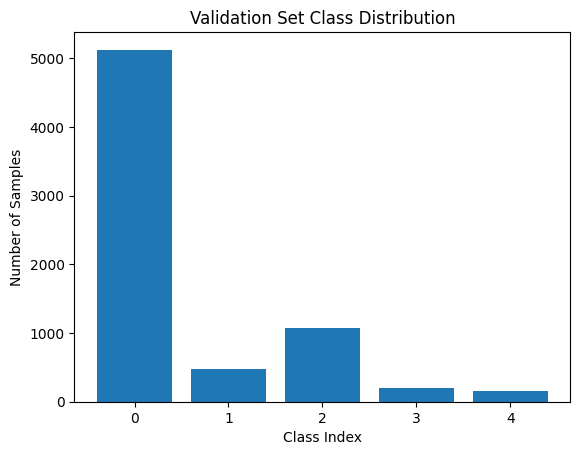

In [40]:
# Insert your code for Exercise 3 - Step 7 here

import numpy as np
import matplotlib.pyplot as plt

# Count class distribution
ex_labels_val = val_gen.classes
class_counts = np.bincount(ex_labels_val)

# Plot distribution
plt.bar(range(len(class_counts)), class_counts)
plt.xlabel("Class Index")
plt.ylabel("Number of Samples")
plt.title("Validation Set Class Distribution")
plt.show()


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image43C.png)

### **Exercise 3 - Step 8: Setup `ResNet101` Base Network**

In the cell below write the code to setup your base network using `ResNet101` instead of `ResNet50`. Called your new model `ResNet101_model_512`.

**Code Hints:**

1. Change this line of code
```text
base = ResNet50(weights='imagenet', include_top=False, input_shape=(244, 244, 3))
```
to read
```text
base = ResNet101(weights='imagenet', include_top=False, input_shape=(512, 512, 3))
```
2. Change this line of code
```text
ResNet50_model_244 = models.Model(inputs=base.input, outputs=predictions)
```
to read
```text
ResNet101_model_512 = models.Model(inputs=base.input, outputs=predictions)
```
3. Change this line of code
```text
ResNet50_model_244.compile(optimizer=optimizers.Adam(1e-4),
```
to read
```text
ResNet101_model_512.compile(optimizer=optimizers.Adam(1e-4),
```





In [41]:
# Insert your code for Exercise 3 - Step 8 here

from tensorflow.keras.applications import ResNet101
from tensorflow.keras import layers, models, optimizers

base = ResNet101(weights='imagenet', include_top=False, input_shape=(512, 512, 3))
base.trainable = False          # keep the pretrained weights frozen

x = base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
predictions = layers.Dense(5, activation='softmax')(x)

ResNet101_model_512 = models.Model(inputs=base.input, outputs=predictions)
ResNet101_model_512.compile(optimizer=optimizers.Adam(1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


If the code is correct you should see the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image44C.png)

### **Exercise 3 - Step 9: Train Neural Network**

In the cell below write the code to train your neural network `ResNet101_model_512`. Set the number of epochs to `10` and patience to `3`.

**Code Hints:**

Change this line of code
```text
history_244 = ResNet50_model_244.fit(
```
to read
```text
history_512 = ResNet101_model_512.fit(
```

In [ ]:
# Insert your code for Exercise 3 - Step 9 here
import time
import tensorflow as tf

# Set number of epochs
EPOCHS=10

# Set Patience
PATIENCE=3

# ------------------------------------------------------------------------
# 1️⃣  Start training
# ------------------------------------------------------------------------
print(f"-- Training (classification) is starting for {EPOCHS} epochs----------------------------")
start_time = time.time()
history_512 = ResNet101_model_512.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen,
    steps_per_epoch=len(train_gen),
    validation_steps=len(val_gen),
    callbacks=[
        tf.keras.callbacks.EarlyStopping(patience=PATIENCE, restore_best_weights=True)
    ]
)

# Record end time
elapsed_time = time.time() - start_time

# Print elapsed time
print(f"Elapsed time: {hms_string(elapsed_time)}")

If the code is correct you should see something similar to the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image45C.png)

It should be noted that while the images in `train_512` were more than 4X larger (by pixel count) the training time was essentially the same as in Example 3 - Step 9 for the smaller 244X244 px images.

### **Exercise 3 - Step 10: Plot Training History**

In the cell below write the code to plot the training history of your `ResNet101_model_512`.


**Code Hints:**

1. Change this line of code
```text
eg_val_acc = history_244.history.get('val_accuracy')
```
to read
```text
ex_val_acc = history_512.history.get('val_accuracy')
```
2. Change this line of code
```text
eg_train_acc = history_244.history.get('accuracy')
```
to read
```text
ex_train_acc = history_512.history.get('accuracy')
```


In [ ]:
# Insert your code for Exercise 3 - Step 10 here

import numpy as np
import matplotlib.pyplot as plt


# Pull the metrics
ex_val_acc = history_512.history.get('val_accuracy')
ex_train_acc = history_512.history.get('accuracy')

# --- Find the epoch with the highest validation accuracy -------------
# np.argmax returns the index (0‑based). Add 1 if you want to show it as "epoch 1, 2, …"
best_epoch_idx = np.argmax(ex_val_acc)       # 0‑based index
best_epoch_num = best_epoch_idx + 1          # 1‑based for display

# -----------------------------------------------------------------------

plt.figure(figsize=(8, 4))
plt.plot(ex_val_acc, label='ex_val_accuracy')
plt.plot(ex_train_acc, label='accuracy')

# Vertical line at the best epoch (0‑based index)
plt.axvline(best_epoch_idx, color='r', linestyle='--',
            label=f'Best epoch (epoch {best_epoch_num})')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training / Validation Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Optional: annotate the exact accuracy value at the best epoch
best_ex_val_acc = ex_val_acc[best_epoch_idx]
plt.text(best_epoch_idx, best_ex_val_acc,
         f'{best_ex_val_acc:.4f}',
         va='bottom', ha='right', color='r', fontsize=9)

plt.tight_layout()
plt.show()


If the code is correct you should see something similar to the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image51C.png)


### **Analysis**

1. **Training vs Validation Accuracy:**

* Both curves show a general upward trend, indicating that the model is learning over time.
* The training accuracy is consistently higher than the validation accuracy, which is typical and suggests the model is fitting the training data well.

2. **Best Epoch at 9:**

* Although the x-axis only goes up to 8, the best validation accuracy is noted at epoch 9. This might imply that the training continued beyond what's shown in the plot, or the plot is cropped.
* The peak validation accuracy of **`0.7634`** suggests a decent generalization performance.

3. **Possible Overfitting:**

* If the training accuracy continues to rise while validation accuracy plateaus or drops (not fully visible here), it could indicate overfitting. However, from the visible data, the gap between training and validation accuracy is not extreme.

### **Exercise 3 - Step 11: Save Model to GDrive**

In the next cell write the code to save your `ResNet101_model_512` to your GDrive.

**Code Hints:**

Change this line of code
```text
model_name     = "ResNet50_model_244"                    # model object name
```
to read
```text
model_name     = "ResNet101_model_512"                    # model object name
```

In [ ]:
# Insert your code for Example 3 - Step 11 here

import os
import shutil
import tensorflow as tf

# --------------------------------------------------------------
# 1️⃣  Mount Google Drive (do this only once per session)
# --------------------------------------------------------------
# from google.colab import drive
# drive.mount('/content/drive')

# --------------------------------------------------------------
# 2️⃣  Define the names / paths
# --------------------------------------------------------------
model_name     = "ResNet101_model_512"                    # model object name
gdrive_dir     = f"/content/drive/My Drive/{model_name}"  # folder on Drive
gdrive_file    = f"{gdrive_dir}.keras"                    # the file we want to keep

local_dir      = f"/content/{model_name}"                 # the *local* folder you want to delete
local_file     = f"{local_dir}.keras"                     # if you saved a single file locally

# --------------------------------------------------------------
# 3️⃣  Make sure the Drive folder exists
# --------------------------------------------------------------
os.makedirs(gdrive_dir, exist_ok=True)

# --------------------------------------------------------------
# 4️⃣  Save the model *on* Drive (kept forever)
# --------------------------------------------------------------
ResNet101_model_512.save(gdrive_file)   # <-- this writes the file into /content/drive/My Drive/

# --------------------------------------------------------------
# 5️⃣  OPTIONAL: Verify the Drive copy exists
# --------------------------------------------------------------
print("Drive copy present:", os.path.exists(gdrive_file))
!ls ./drive/MyDrive

If the code is correct you should see something similar to the following output

![__](https://biologicslab.co/BIO1173/images/class_03/class_03_2_image53C.png)

Your `ResNet101_model_512` is now safely stored on your GDrive. If you wanted to you could easily copy your model back from your GDrive into you current Google COLAB directory and use it analyze new retinal fundus images, looking for signs of diabetic retinopathy.

Always keep in mind a common saying among members of the ML/AI community:

> **_“Train-once, deploy-many”_**



## **Lesson Turn-in**

When you have completed and run all of the code cells, use the **File --> Print.. --> Save to PDF** to generate a PDF of your Colab notebook. Save your PDF as `Class_03_2.lastname.pdf` where _lastname_ is your last name, and upload the file to Canvas.

## **Lizard Tail**


## **BASIC**

![__](https://upload.wikimedia.org/wikipedia/commons/7/7b/AtariBASIC.png)

# Introduction to BASIC Programming Language

## What is BASIC?

**BASIC** (Beginner's All-purpose Symbolic Instruction Code) is a high-level programming language designed to be easy to learn and use. It was created with the goal of providing access to computing power for students and non-professional programmers, emphasizing simplicity and readability.

BASIC uses straightforward syntax and commands that resemble English, making it an ideal first language for beginners. Over time, it has evolved into many dialects and influenced the development of numerous other programming languages.

---

## **Historical Summary**

#### **Origins**

- **Year Created**: 1964  
- **Creators**: John G. Kemeny and Thomas E. Kurtz  
- **Institution**: Dartmouth College

Kemeny and Kurtz developed BASIC to enable students in fields other than science and mathematics to use computers. At the time, most programming languages were complex and required deep technical knowledge. BASIC was designed to democratize computing.

#### **Key Milestones**

- **1964**: First implementation of BASIC on a GE-225 mainframe at Dartmouth College.
- **1970s**: BASIC became widely adopted on microcomputers, especially with the rise of personal computing.
- **1975**: Microsoft was founded to develop a version of BASIC (Altair BASIC) for the Altair 8800, marking the beginning of Microsoft's software empire.
- **1980s**: Variants like GW-BASIC, QuickBASIC, and Turbo BASIC became popular on MS-DOS systems.
- **1991**: Microsoft introduced Visual Basic, combining BASIC with a graphical user interface (GUI) development environment.
- **2000s–Present**: Modern dialects like VB.NET continue to be used, especially in enterprise and educational settings.

#### **Legacy**

BASIC played a crucial role in the early days of personal computing. It introduced millions of people to programming and laid the foundation for many modern languages. While its use has declined in favor of more powerful and flexible languages, its influence remains significant in the history of computer science.

---

## Example BASIC Code

```basic
10 PRINT "HELLO, WORLD!"
20 END
```

**BASIC (Beginners' All-purpose Symbolic Instruction Code)** is a family of general-purpose, high-level programming languages designed for ease of use. The original version was created by John G. Kemeny and Thomas E. Kurtz at Dartmouth College in 1963. They wanted to enable students in non-scientific fields to use computers. At the time, nearly all computers required writing custom software, which only scientists and mathematicians tended to learn.

In addition to the programming language, Kemeny and Kurtz developed the Dartmouth Time-Sharing System (DTSS), which allowed multiple users to edit and run BASIC programs simultaneously on remote terminals. This general model became popular on minicomputer systems like the PDP-11 and Data General Nova in the late 1960s and early 1970s. Hewlett-Packard produced an entire computer line for this method of operation, introducing the HP2000 series in the late 1960s and continuing sales into the 1980s. Many early video games trace their history to one of these versions of BASIC.

The emergence of microcomputers in the mid-1970s led to the development of multiple BASIC dialects, including Microsoft BASIC in 1975. Due to the tiny main memory available on these machines, often 4 KB, a variety of Tiny BASIC dialects were also created. BASIC was available for almost any system of the era, and became the de facto programming language for home computer systems that emerged in the late 1970s. These PCs almost always had a BASIC interpreter installed by default, often in the machine's firmware or sometimes on a ROM cartridge.

BASIC declined in popularity in the 1990s, as more powerful microcomputers came to market and programming languages with advanced features (such as Pascal and C) became tenable on such computers. By then, most nontechnical personal computer users relied on pre-written applications rather than writing their own programs. In 1991, Microsoft released Visual Basic, combining an updated version of BASIC with a visual forms builder. This reignited use of the language and "VB" remains a major programming language in the form of VB.NET, while a hobbyist scene for BASIC more broadly continues to exist.

**Origin**

John G. Kemeny was the chairman of the Dartmouth College Mathematics Department. Based largely on his reputation as an innovator in math teaching, in 1959 the college won an Alfred P. Sloan Foundation award for \$500,000 to build a new department building. Thomas E. Kurtz had joined the department in 1956, and from the 1960s Kemeny and Kurtz agreed on the need for programming literacy among students outside the traditional STEM fields. Kemeny later noted that "Our vision was that every student on campus should have access to a computer, and any faculty member should be able to use a computer in the classroom whenever appropriate. It was as simple as that."

Kemeny and Kurtz had made two previous experiments with simplified languages, DARSIMCO (Dartmouth Simplified Code) and DOPE (Dartmouth Oversimplified Programming Experiment). These did not progress past a single freshman class. New experiments using Fortran and ALGOL followed, but Kurtz concluded these languages were too tricky for what they desired. As Kurtz noted, Fortran had numerous oddly formed commands, notably an "almost impossible-to-memorize convention for specifying a loop: DO 100, I = 1, 10, 2. Is it '1, 10, 2' or '1, 2, 10', and is the comma after the line number required or not?"

Moreover, the lack of any sort of immediate feedback was a key problem; the machines of the era used batch processing and took a long time to complete a run of a program. While Kurtz was visiting MIT, John McCarthy suggested that time-sharing offered a solution; a single machine could divide up its processing time among many users, giving them the illusion of having a (slow) computer to themselves.[8] Small programs would return results in a few seconds. This led to increasing interest in a system using time-sharing and a new language specifically for use by non-STEM students.

Kemeny wrote the first version of BASIC. The acronym BASIC comes from the name of an unpublished paper by Thomas Kurtz.The new language was heavily patterned on FORTRAN II; statements were one-to-a-line, numbers were used to indicate the target of loops and branches, and many of the commands were similar or identical to Fortran. However, the syntax was changed wherever it could be improved. For instance, the difficult to remember DO loop was replaced by the much easier to remember FOR I = 1 TO 10 STEP 2, and the line number used in the DO was instead indicated by the NEXT I. Likewise, the cryptic IF statement of Fortran, whose syntax matched a particular instruction of the machine on which it was originally written, became the simpler IF I=5 THEN GOTO 100. These changes made the language much less idiosyncratic while still having an overall structure and feel similar to the original FORTRAN.

The project received a $300,000 grant from the National Science Foundation, which was used to purchase a GE-225 computer for processing, and a Datanet-30 realtime processor to handle the Teletype Model 33 teleprinters used for input and output. A team of a dozen undergraduates worked on the project for about a year, writing both the DTSS system and the BASIC compiler. The first version BASIC language was released on 1 May 1964.

Initially, BASIC concentrated on supporting straightforward mathematical work, with matrix arithmetic support from its initial implementation as a batch language, and character string functionality being added by 1965. Usage in the university rapidly expanded, requiring the main CPU to be replaced by a GE-235,[7] and still later by a GE-635. By the early 1970s there were hundreds of terminals connected to the machines at Dartmouth, some of them remotely.

Wanting use of the language to become widespread, its designers made the compiler available free of charge. In the 1960s, software became a chargeable commodity; until then, it was provided without charge as a service with expensive computers, usually available only to lease. They also made it available to high schools in the Hanover, New Hampshire, area and regionally throughout New England on Teletype Model 33 and Model 35 teleprinter terminals connected to Dartmouth via dial-up phone lines, and they put considerable effort into promoting the language. In the following years, as other dialects of BASIC appeared, Kemeny and Kurtz's original BASIC dialect became known as Dartmouth BASIC.

New Hampshire recognized the accomplishment in 2019 when it erected a highway historical marker in Hanover describing the creation of "the first user-friendly programming language".

### **The Rise of BASIC: From Dartmouth Labs to the Personal Computer Revolution**

> **B**asic **A**lgebraic **S**tandard **T**erm (BASIC) is more than a language—it is the catalyst that turned hobbyist curiosity into a worldwide PC industry.  
---

#### **1. Birth of BASIC (1964‑1965)**

| Year | Milestone | Notes |
|------|-----------|-------|
| **1964** | Dartmouth College computer science course | John G. Kemeny & Thomas E. Kurtz design a *simple* language for students who had never coded before. |
| **1965** | Dartmouth BASIC released | Written in 4 KB of machine code for the IBM 704. Emphasis: **clarity**, **interactivity**, and **line‑numbered scripts**. |

### 1.1 Design Goals
- **Accessibility**: Use everyday math notation (`LET`, `PRINT`, `GOTO`).
- **Education**: Allow students to learn programming concepts without deep hardware knowledge.
- **Rapid Prototyping**: Quick translation from idea to executable script.

> *Quote*: “We wanted a language that *could* be used by a person with no background in programming to write useful programs in a reasonable amount of time.” – *Kemeny & Kurtz*

---

#### **2. Early Evolution & Variants**

| Variant | Platform | Key Features | Year |
|---------|----------|--------------|------|
| **Algol‑60‑derived BASIC** | Dartmouth 704, 7090 | First *non‑line‑numbered* mode (interactive) | 1965 |
| **BASIC‑PLUS** | DEC PDP‑8 | Introduced subroutines, `ON GOSUB` | 1967 |
| **Microsoft BASIC** | Altair 8800 (assembly) | Commercialized BASIC; later ported to DOS | 1975 |
| **GW‑BASIC** | IBM PC | Microsoft’s *free* BASIC in DOS 1.0 | 1980 |
| **AppleSoft BASIC** | Apple II | Built‑in `FOR…NEXT`, `READ…DATA` | 1977 |
| **BBC BASIC** | BBC Micro | Graphics, sound, and structured programming support | 1981 |
| **Turbo BASIC** | Turbo Pascal & Turbo C* | Fast interpreter on DOS | 1985 |

*Note:* Most dialects kept the **line‑numbered** format, which was both a strength (easy debugging) and a weakness (inefficient).

---

#### **3. BASIC in the Education & Hobbyist Scene**

##### 3.1 The “BASIC People”
- A generation of programmers grew up writing code in BASIC.
- Encouraged *self‑education* and *problem‑solving* outside formal settings.

##### 3.2 First‑hand Experience
```basic
10 PRINT "HELLO, WORLD!"
20 GOTO 10
```

## **Simplicity and Immediate Feedback**
- **Simplicity**: One line of code, one command, no compilation.  
- **Immediate feedback**: The interpreter echoed output instantly.

#### **3.3 Software & Games**
- Early microcomputer game studios (e.g., Sierra, Origin Systems) started in BASIC.  
- BASIC was the lingua franca for shareware and homebrew games.

#### **4. BASIC Meets the Microcomputer Revolution**

| Microcomputer | BASIC Variant | Impact |
|---------------|---------------|--------|
| Altair 8800 | Altair BASIC (Microsoft) | Sparked the Altair BASIC craze; early PC kit sales. |
| Apple II | Applesoft BASIC | Built‑in BASIC; many users bought the Apple II solely for the built‑in interpreter. |
| Commodore PET | Commodore BASIC | Bundled with all PET models; the first home computer with a full keyboard and monitor. |
| TRS‑80 | Tandy BASIC | Made programming accessible to hobbyists; popular in the “Micro‑computer” market. |
| IBM PC (1981) | Microsoft’s GW‑BASIC | Became part of the default DOS installation, ensuring a ready‑made audience for PC software. |

#### **5. Why BASIC Was Key to the PC Revolution**

| Factor | How BASIC Contributed |
|--------|-----------------------|
| Low Barrier to Entry | Students and hobbyists could write simple programs without mastering machine code. |
| Rapid Development | Interactive loop allowed quick prototyping → more software in the market. |
| Learning Path | BASIC served as a stepping stone to languages like Pascal, C, and later Java/Python. |
| Ecosystem Creation | A huge library of demos, utilities, and games created a “software market” for PCs. |
| Cultural Momentum | The phrase “I wrote a BASIC program” became part of tech folklore, fostering a generation of self‑taught coders. |

#### **6. The Decline of BASIC and Its Legacy**

| Period | Change | Outcome |
|--------|--------|---------|
| Early 1990s | Introduction of C/C++, Visual Basic, and Java | BASIC’s role as mainstream teaching language diminished. |
| Late 1990s | Emphasis on structured programming | Many BASIC dialects replaced by VB or VB.NET for business apps. |
| 2000s‑Present | Python & JavaScript | Python’s readability echoes BASIC’s ethos; it is now the primary teaching language in many curricula. |

**Legacy**

- BASIC’s design principles (interactive, readable syntax) influenced later languages.  
- Microsoft’s Visual Basic introduced the event‑driven GUI paradigm, a staple in modern programming.

#### **7. Quick Reference: Sample BASIC Code**

```basic
REM Simple calculator
10 PRINT "Enter first number: ";
20 INPUT A
30 PRINT "Enter second number: ";
40 INPUT B
50 PRINT "Sum is "; A + B
```